In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = sns.load_dataset("titanic")
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived'>

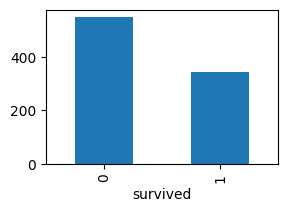

In [4]:
plt.figure(figsize=(3,2))
df['survived'].value_counts().plot(kind='bar')

In [5]:
df.groupby(['survived', 'sex'])['survived'].size()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [6]:
df.groupby(['survived', 'adult_male'])['survived'].size()

survived  adult_male
0         False         100
          True          449
1         False         254
          True           88
Name: survived, dtype: int64

In [7]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df = df.drop(['deck', 'alive', 'embark_town'], axis=1)

In [9]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,False


In [10]:
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [13]:
df.shape

(889, 12)

In [14]:
x = df.drop(['survived'], axis=1)
y = df['survived']

In [15]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [16]:
mms = MinMaxScaler()
le = LabelEncoder()

In [17]:
for col in x.columns:
    #print(col)
    if is_numeric_dtype(x[col]):
        x[col] = mms.fit_transform(x[[col]])
    else:
        x[col] = le.fit_transform(x[col])

In [18]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,1.0,1,0.271174,0.125,0.0,0.014151,2,2,1,1.0,0.0
1,0.0,0,0.472229,0.125,0.0,0.139136,0,0,2,0.0,0.0
2,1.0,0,0.321438,0.000,0.0,0.015469,2,2,2,0.0,1.0
3,0.0,0,0.434531,0.125,0.0,0.103644,2,0,2,0.0,0.0
4,1.0,1,0.434531,0.000,0.0,0.015713,2,2,1,1.0,1.0


In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
knnc = KNeighborsClassifier()

In [21]:
model = knnc.fit(xtrain, ytrain)

In [22]:
model.score(xtrain, ytrain)

0.8748241912798875

In [23]:
model.score(xtest, ytest)

0.7808988764044944

In [24]:
#prediction
pred = model.predict(xtest)

In [25]:
#confusion matrix
cm = confusion_matrix(ytest, pred)

In [26]:
cm

array([[88, 21],
       [18, 51]])

<Axes: >

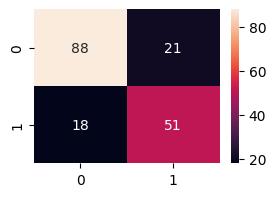

In [27]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True)

In [28]:
ytest.value_counts()

survived
0    109
1     69
Name: count, dtype: int64

In [29]:
ytest.shape

(178,)

In [30]:
xtest.shape

(178, 11)

In [31]:
accuracy_score(ytest, pred)

0.7808988764044944

In [32]:
cl = classification_report(pred, ytest)
print(cl)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       106
           1       0.74      0.71      0.72        72

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [33]:
for i in range(2,10):
    print("Value of K is", i)
    knnc1 = KNeighborsClassifier()
    model1 = knnc1.fit(xtrain, ytrain)
    print("Check The Train Score")
    print(model1.score(xtrain, ytrain))
    print("check accuracy for the test data")
    print(model1.score(xtest, ytest))
    pred = model1.predict(xtest)
    print("Evaluate the model")
    cm = confusion_matrix(ytest, pred)
    print(cm)
    print("____________________")
    print("")

Value of K is 2
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
____________________

Value of K is 3
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
____________________

Value of K is 4
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
____________________

Value of K is 5
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
____________________

Value of K is 6
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
____________________

Value of K is 7
Check The Train Score
0.8748241912798875
check accuracy for the test data
0.7808988764044944
Evaluate the model
[[88 21]
 [18 51]]
________

In [34]:
train_score = []
test_score = []

for i in range(2,10):
    print("value of k is", i)
    knn1= KNeighborsClassifier(n_neighbors=i)
    model1= knn1.fit(xtrain, ytrain)
    #append train score
    train_sc= model1.score(xtrain, ytrain)
    train_score.append(train_sc)
    #append test score
    test_sc= model1.score(xtest, ytest)
    test_score.append(test_sc)
    print(f'Train Score: {train_score}')
    print(f'Test Score: {test_score}')
    print("____________________")
    print("")

value of k is 2
Train Score: [0.8987341772151899]
Test Score: [0.797752808988764]
____________________

value of k is 3
Train Score: [0.8987341772151899, 0.8804500703234881]
Test Score: [0.797752808988764, 0.7865168539325843]
____________________

value of k is 4
Train Score: [0.8987341772151899, 0.8804500703234881, 0.8790436005625879]
Test Score: [0.797752808988764, 0.7865168539325843, 0.797752808988764]
____________________

value of k is 5
Train Score: [0.8987341772151899, 0.8804500703234881, 0.8790436005625879, 0.8748241912798875]
Test Score: [0.797752808988764, 0.7865168539325843, 0.797752808988764, 0.7808988764044944]
____________________

value of k is 6
Train Score: [0.8987341772151899, 0.8804500703234881, 0.8790436005625879, 0.8748241912798875, 0.8537271448663853]
Test Score: [0.797752808988764, 0.7865168539325843, 0.797752808988764, 0.7808988764044944, 0.7921348314606742]
____________________

value of k is 7
Train Score: [0.8987341772151899, 0.8804500703234881, 0.87904360056